In [7]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dig = load_digits()
onehot_target = pd.get_dummies(dig.target)
x_train, x_val_test, y_train, y_val_test = train_test_split(dig.data, onehot_target, test_size=0.2, random_state=20)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=20)

model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist=model.fit(x_train, y_train, epochs=80, batch_size=64,validation_data=(x_val,y_val) )

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
23/23 [==============================] - 0s 7ms/step - loss: 2.4600 - categorical_accuracy: 0.1037 - val_loss: 2.3027 - val_categorical_accuracy: 0.0500
Epoch 2/80
23/23 [==============================] - 0s 2ms/step - loss: 2.2685 - categorical_accuracy: 0.1253 - val_loss: 2.2407 - val_categorical_accuracy: 0.1889
Epoch 3/80
23/23 [=============================

# **Visualising loss and accuracy:**

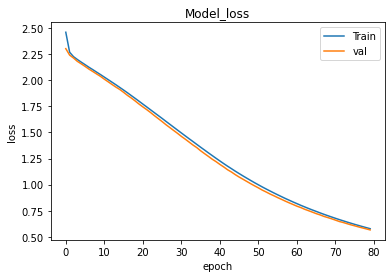

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','val'],loc='upper right')
plt.show()

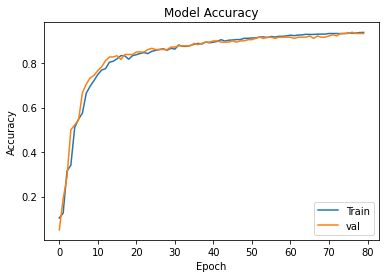

In [12]:
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','val'],loc='lower right')
plt.show()

## *Inference-  Model does not overfit.*